In [216]:
import numpy as np
import pandas as pd
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [217]:
df = pd.read_csv("adult.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [218]:
df.sample(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
3865,46,Private,HS-grad,Married-civ-spouse,Sales,Wife,White,Female,40,United-States,>50K,133
27113,57,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,10,United-States,<=50K,42
9901,29,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,24,United-States,<=50K,47
15950,63,Self-emp-not-inc,Some-college,Divorced,Exec-managerial,Not-in-family,White,Male,50,United-States,<=50K,16
24292,29,Private,HS-grad,Separated,Adm-clerical,Own-child,White,Female,40,United-States,<=50K,41


In [219]:
df_filtered = df.loc[(df != "?").all(axis=1)]
df_filtered.sample(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
28927,43,Private,HS-grad,Divorced,Machine-op-inspct,Own-child,White,Male,40,United-States,<=50K,18
29159,35,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,30,United-States,<=50K,47
19625,17,Private,11th,Never-married,Craft-repair,Own-child,White,Male,16,United-States,<=50K,26
25020,34,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Wife,White,Female,40,United-States,<=50K,28
29571,45,Private,11th,Married-civ-spouse,Craft-repair,Husband,White,Male,42,United-States,<=50K,17


In [220]:
df.loc[1167]

age                          22
workclass                     ?
education          Some-college
marital-status    Never-married
occupation                    ?
relationship          Own-child
race                      White
sex                      Female
hours-per-week                8
native-country    United-States
salary                    <=50K
salary K$                    47
Name: 1167, dtype: object

In [221]:
df_filtered.loc[1167]

KeyError: 1167

In [222]:
df = df_filtered

In [223]:
df["salary_check"] = df["salary K$"] > 50
df["salary_check"].replace({True: ">50K", False: "<=50K"}, inplace=True)
(df["salary_check"] == df["salary"]).all()

True

In [224]:
df.drop("salary_check", inplace=True, axis=1)

# Task 1
Print the count of men and women in the dataset.

In [225]:
df.sex.value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [226]:
df.groupby("sex").age.mean()

sex
Female    36.883459
Male      39.184004
Name: age, dtype: float64

# Task 3
Get the percentage of people from Poland (native-country)

In [227]:
df["native-country"].value_counts(normalize=True)["Poland"] * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [228]:
df.groupby("salary").age.agg(["mean", "std"])

,mean,std
salary,,
<=50K,36.60806,13.464631
>50K,43.95911,10.269633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [229]:
df[~df.education.isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]) & (df.salary == ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [230]:
df.groupby("education").age.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [231]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [232]:
df["marital-status"] = df["marital-status"].apply(lambda x: "Married" if "Married" in x else 'Not Married')

In [233]:
df.groupby(["marital-status", "salary"]).salary.count()

marital-status  salary
Married         <=50K      8016
                >50K       6440
Not Married     <=50K     14638
                >50K       1068
Name: salary, dtype: int64

<Axes: xlabel='marital-status', ylabel='count'>

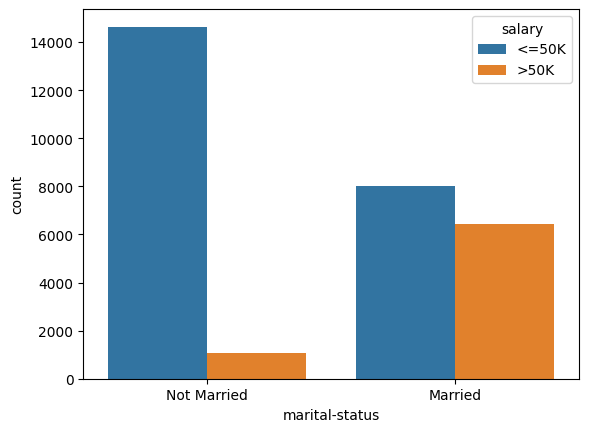

In [234]:
sns.countplot(x="marital-status", hue="salary", data=df)

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [235]:
df["hours-per-week"].max()

99

In [236]:
df[df["hours-per-week"] == df["hours-per-week"].max()]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
935,37,Private,HS-grad,Married,Craft-repair,Husband,White,Male,99,United-States,>50K,274
1172,25,Private,Masters,Married,Farming-fishing,Not-in-family,White,Male,99,United-States,>50K,207
1887,55,Self-emp-not-inc,Some-college,Married,Farming-fishing,Husband,White,Male,99,United-States,>50K,188
3578,37,Self-emp-inc,Doctorate,Married,Prof-specialty,Husband,Black,Male,99,United-States,>50K,136
4308,35,Self-emp-not-inc,HS-grad,Married,Farming-fishing,Husband,White,Male,99,United-States,<=50K,21
...,...,...,...,...,...,...,...,...,...,...,...,...
30754,31,Private,Prof-school,Not Married,Prof-specialty,Not-in-family,White,Female,99,United-States,<=50K,31
30766,42,Self-emp-not-inc,HS-grad,Married,Farming-fishing,Husband,White,Male,99,United-States,>50K,290
30992,40,Self-emp-inc,Masters,Not Married,Other-service,Own-child,White,Male,99,United-States,<=50K,48
31681,43,Private,HS-grad,Married,Craft-repair,Husband,White,Male,99,United-States,>50K,237


In [237]:
df.groupby("hours-per-week").count()

,age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,salary K$
hours-per-week,,,,,,,,,,,
1,7,7,7,7,7,7,7,7,7,7,7
2,15,15,15,15,15,15,15,15,15,15,15
3,24,24,24,24,24,24,24,24,24,24,24
4,27,27,27,27,27,27,27,27,27,27,27
5,38,38,38,38,38,38,38,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2,2,2,2,2,2,2,2,2
96,5,5,5,5,5,5,5,5,5,5,5
97,2,2,2,2,2,2,2,2,2,2,2


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [238]:
df.sample(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
959,42,Private,Assoc-acdm,Married,Exec-managerial,Husband,White,Male,40,United-States,>50K,171
56,46,Private,5th-6th,Married,Machine-op-inspct,Husband,White,Male,40,Mexico,<=50K,17
23156,33,Private,Some-college,Not Married,Adm-clerical,Unmarried,Black,Female,40,United-States,<=50K,20
24468,52,Private,9th,Not Married,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,20
24168,49,Private,HS-grad,Married,Craft-repair,Husband,Black,Male,40,United-States,<=50K,43


In [239]:
df['workclass'].replace({
    'Private': 1,
    'Self-emp-not-inc': 1,
    'Self-emp-inc': 1,
    'Federal-gov': 2,
    'Local-gov': 2,
    'State-gov': 2,
    'Without-pay': 0,
}, inplace=True)

In [240]:
df['marital-status'].replace({
    'Married': 1,
    'Not Married': 0,
}, inplace=True)

In [241]:
df.sex.replace({
    'Male': 1,
    'Female': 0,
}, inplace=True)

In [242]:
df.education.replace({
    'Bachelors': 1,
    'Some-college': 1,
    '11th': 0,
    'HS-grad': 0,
    'Prof-school': 1,
    'Assoc-acdm': 1,
    'Assoc-voc': 1,
    '9th': 0,
    '7th-8th': 0,
    '12th': 0,
    'Masters': 1,
    '1st-4th': 0,
    '10th': 0,
    'Doctorate': 1,
    '5th-6th': 0,
    'Preschool': 0,
}, inplace=True)

In [243]:
df_corr = df[df['native-country'] == 'United-States'][['age', 'workclass', 'education', 'sex', 'marital-status', 'salary K$']].corr()

<Axes: >

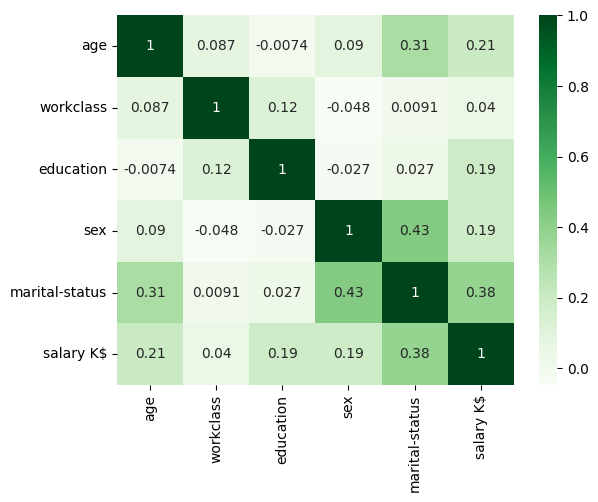

In [245]:
sns.heatmap(df_corr, annot=True, cmap="Greens")

As it is seen from the heatmap, to get more salary, you need to be older, married, have higher education and work in private sector.
To became married, you need to be rich